<a href="https://colab.research.google.com/github/KruthiPenjarla/bubblicious/blob/main/1_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


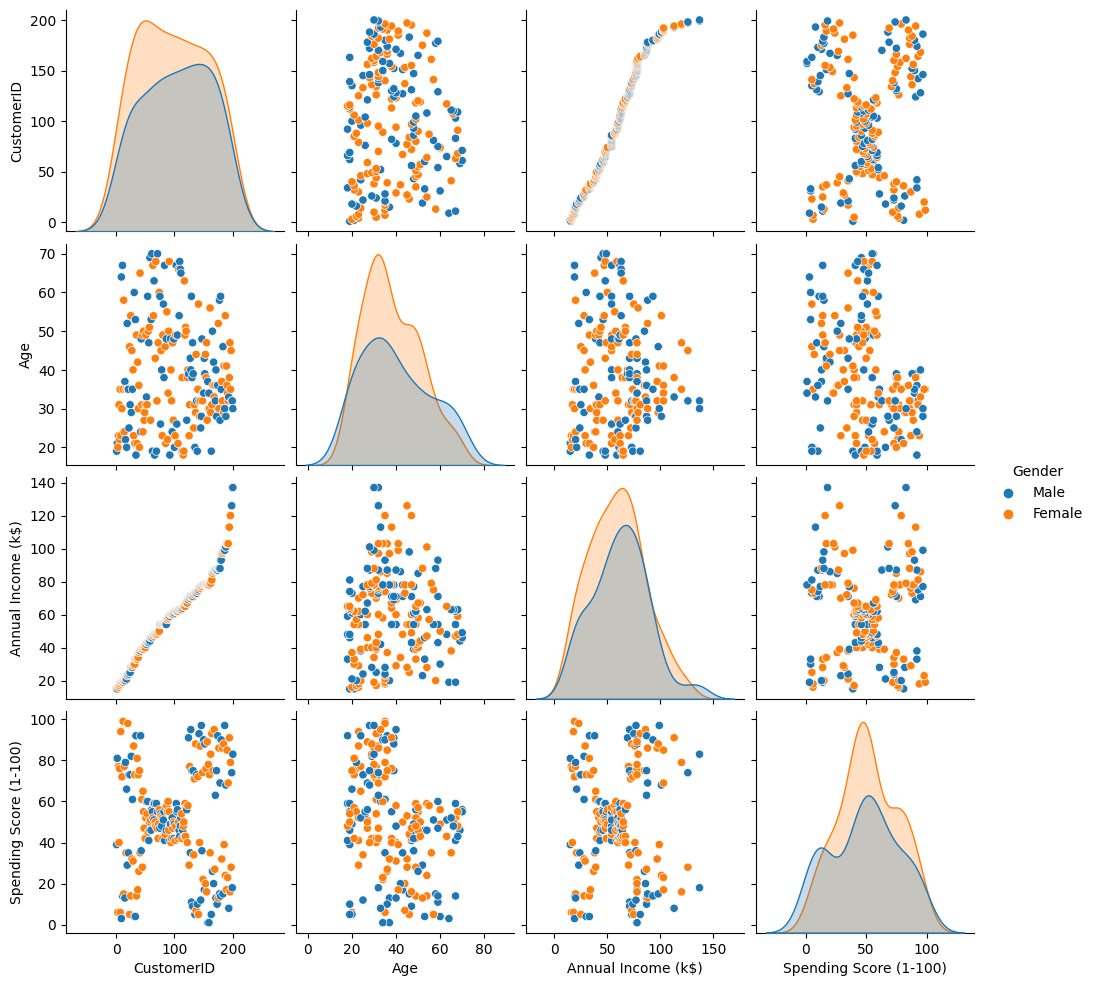

In [7]:
sns.pairplot(df, hue='Gender')

In [18]:
# We're seperating the Gender column
Gender= df["Gender"].tolist()
X=df.drop("Gender",axis= 1)

In [19]:
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)

In [20]:
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)

Text(0.5, 1.0, 'Correlation matrix')

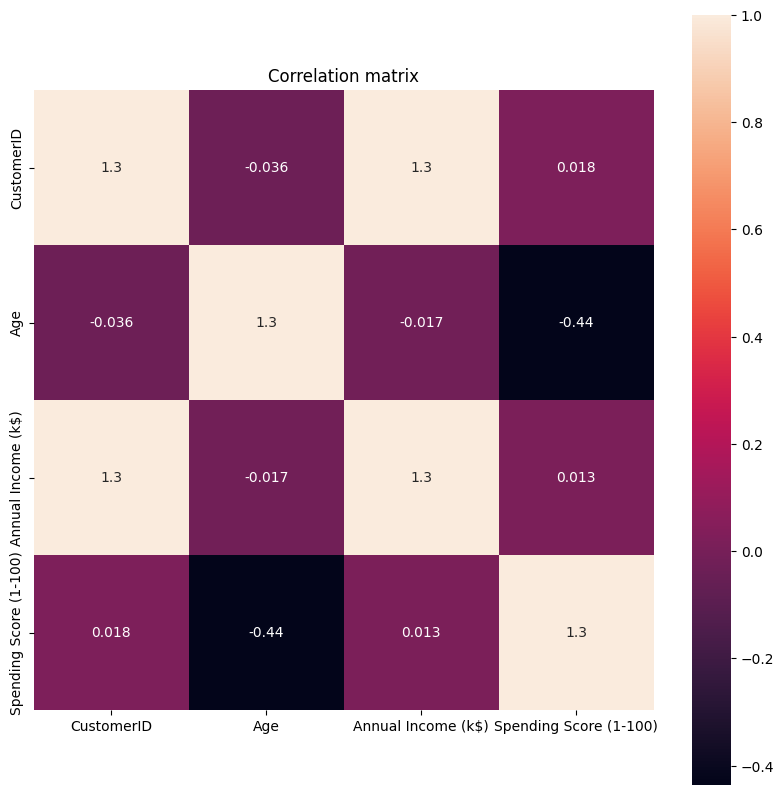

In [21]:
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [22]:
#method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([2.63881512, 1.76769832, 0.89702587, 0.02979403]),
 array([[-0.70644335, -0.02911839, -0.00149141, -0.70716878],
        [ 0.03824562, -0.70590501,  0.7071933 , -0.01063149],
        [-0.70610248, -0.03903059,  0.00985519,  0.70696449],
        [-0.02990575,  0.70663063,  0.70694999, -0.00071211]]))

In [23]:
#method2
np.linalg.eig(X_corr)

(array([2.63881512, 0.02979403, 1.76769832, 0.89702587]),
 array([[ 0.70644335, -0.70716878, -0.02911839, -0.00149141],
        [-0.03824562, -0.01063149, -0.70590501,  0.7071933 ],
        [ 0.70610248,  0.70696449, -0.03903059,  0.00985519],
        [ 0.02990575, -0.00071211,  0.70663063,  0.70694999]]))

In [28]:
#the sum of the eigen values is equal to number of variables.so it's correct
np.sum(eig_values)

5.333333333333334

Text(0.5, 0, 'Dimensions')

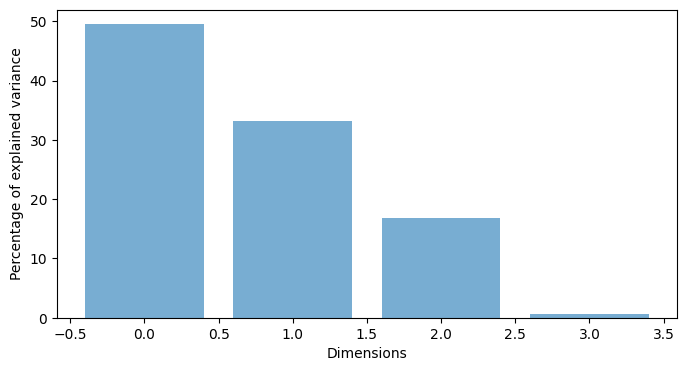

In [25]:
# plotting the variance explained by each PC
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [26]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])


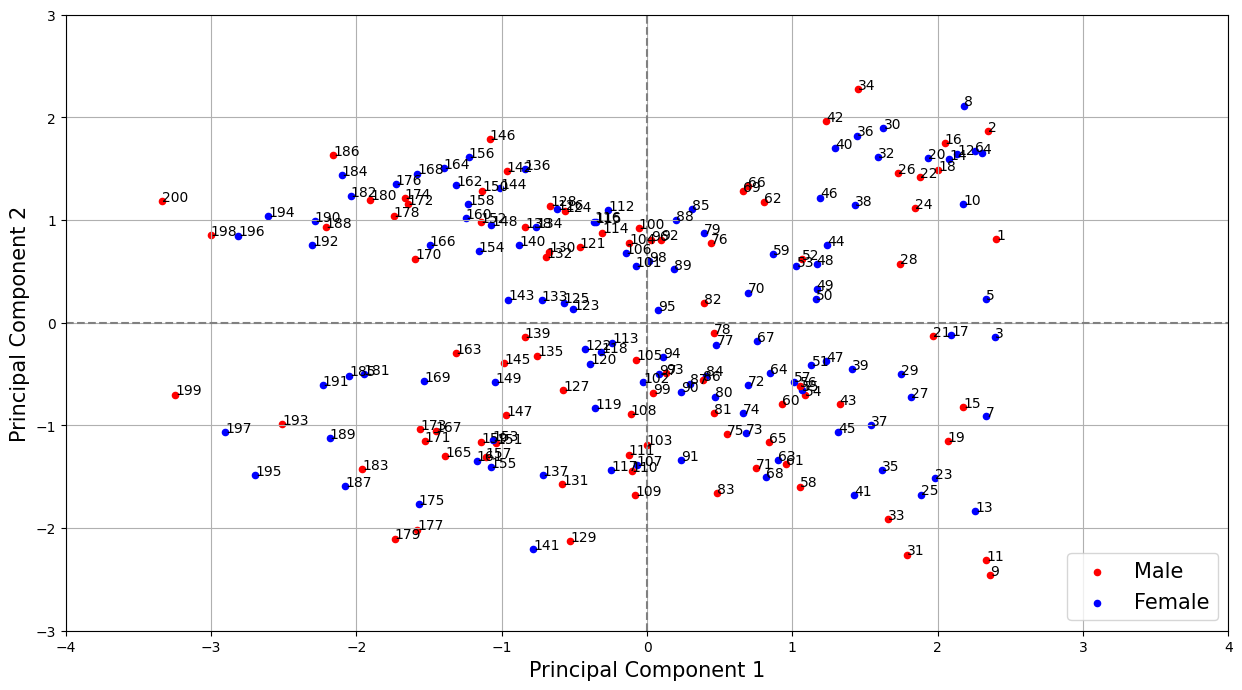

In [27]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))

    species_unique = list(set(Gender))
    species_colors = ["r","b","g"]

    for i, spec in enumerate(Gender):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))

    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)

    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()

plot_scatter(pc1, pc2)


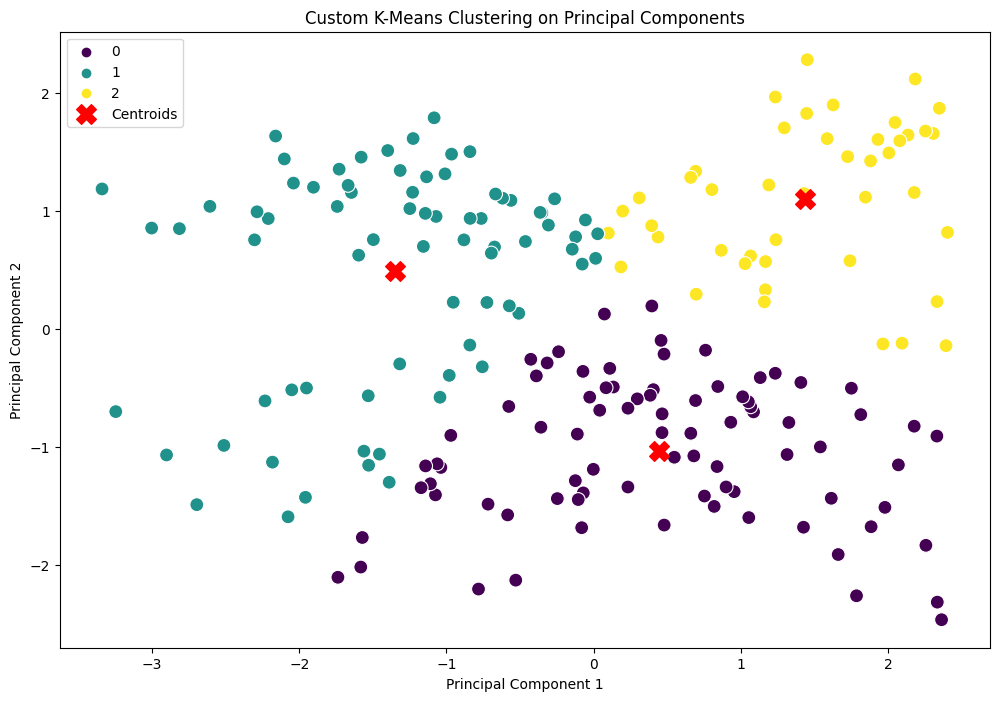

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom K-Means implementation
def custom_kmeans(data, k, max_iterations=100):
    # Randomly initialize centroids
    centroids = data.sample(n=k).values

    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(data.values[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids based on the mean of the points in each cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Apply custom K-Means clustering on the extracted features
n_clusters = 3  # You can adjust the number of clusters
custom_labels, custom_centroids = custom_kmeans(pca_df, n_clusters)

# Visualize the clustered data in the principal component space
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue=custom_labels, palette='viridis', data=pca_df, s=100)
plt.scatter(custom_centroids[:, 0], custom_centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('Custom K-Means Clustering on Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
